# Penguins Classification with Random Forest

## The Data

We will be using the same dataset through our discussions on classification with tree-methods (Decision Tree,Random Forests, and Gradient Boosted Trees) in order to compare performance metrics across these related models.

We will work with the "Palmer Penguins" dataset, as it is simple enough to help us fully understand how changing hyperparameters can change classification results.




Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**Our goal is to create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, instead of needing an experienced biologist**

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv(r"C:\Users\serda\Desktop\SD RECOVERY\DATA SCIENCE\ML\penguins_size.csv")

In [3]:
df.dropna(inplace=True)
df.head()

# We drop the missing values

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,334.0,43.994311,5.460521,32.1,39.5,44.5,48.575,59.6
culmen_depth_mm,334.0,17.160479,1.967909,13.1,15.6,17.3,18.700,21.5
flipper_length_mm,334.0,201.014970,14.022175,172.0,190.0,197.0,213.000,231.0
body_mass_g,334.0,4209.056886,804.836129,2700.0,3550.0,4050.0,4793.750,6300.0


In [6]:
for i, feature in enumerate(df.select_dtypes("object").columns):
   print(f"{i}.{feature:<7}: {df[feature].unique()}")

# We list the unique categorical observations of object featurs. Sex has an incorrect categorical data as “.”. We need to get rid of it.

0.species: ['Adelie' 'Chinstrap' 'Gentoo']
1.island : ['Torgersen' 'Biscoe' 'Dream']
2.sex    : ['MALE' 'FEMALE' '.']


In [7]:
display(df[df["sex"]== "."])
ind = df[df["sex"]== "."].index

# We detect incorrect categorical data in the sex bill.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [8]:
df.drop(index=ind, inplace=True)

# We drop incorrect categorical data in the sex bill.

In [9]:
df.sex.unique()

array(['MALE', 'FEMALE'], dtype=object)

In [10]:
df2 = df.copy()

## Visualization

In [11]:
df["species"].value_counts(normalize=True)

species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: proportion, dtype: float64

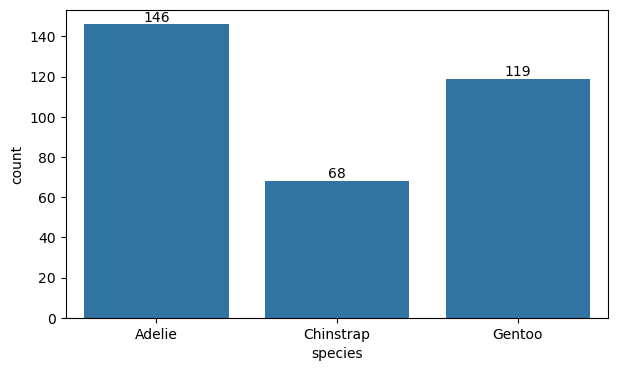

In [12]:
ax = sns.countplot(x="species", data = df)
ax.bar_label(ax.containers[0]);

# There is an inbalanced situation in my data.
# But we will decide whether to treat the data as inbalanced or not after we see the scores.

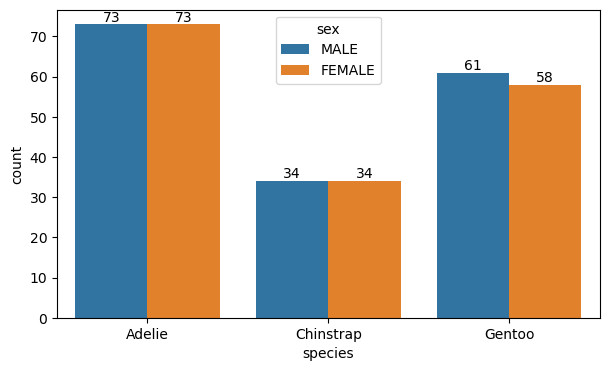

In [13]:
ax = sns.countplot(x="species", data = df, hue = "sex")
for p in ax.containers:
    ax.bar_label(p)

# Distribution according to sex

<Figure size 400x600 with 0 Axes>

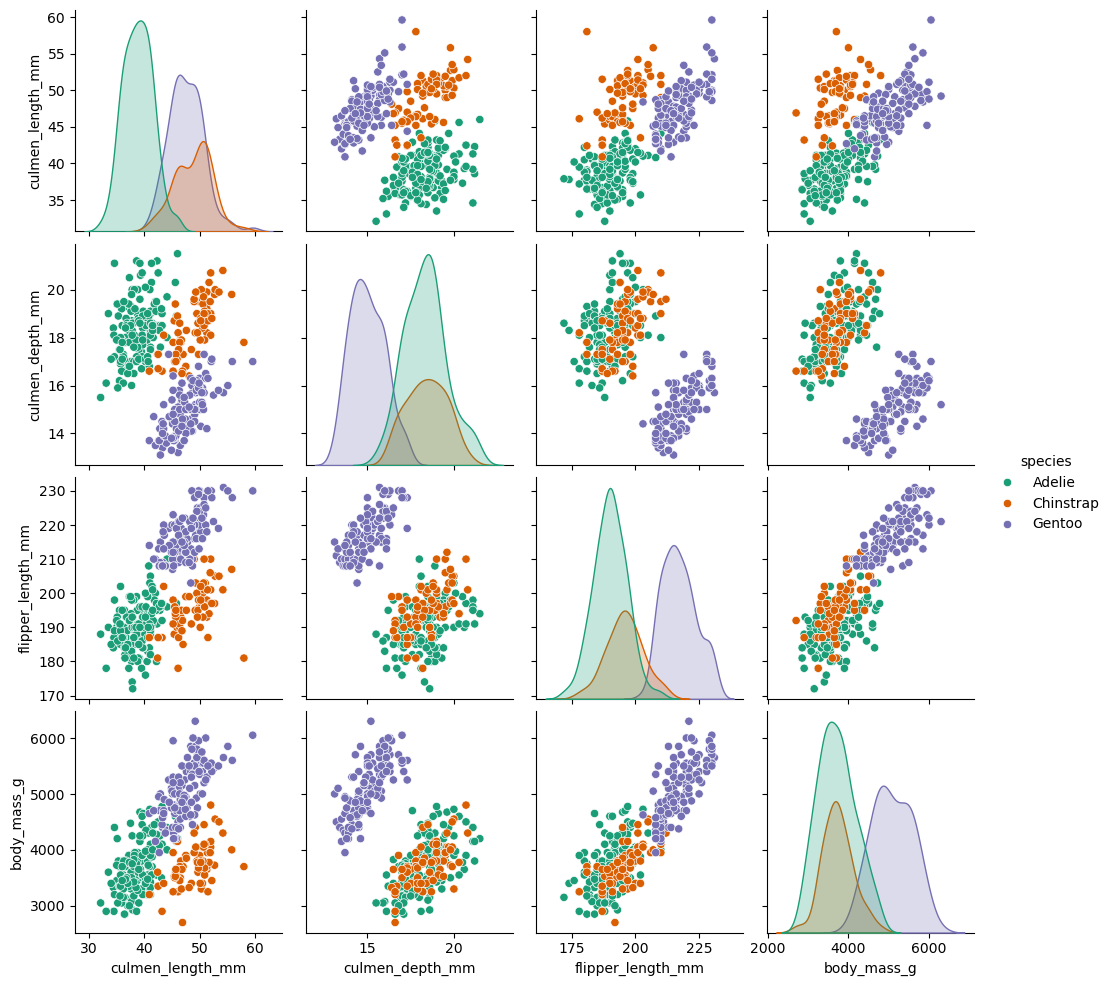

In [14]:
plt.figure(figsize=(4,6))
sns.pairplot(df,hue='species',palette='Dark2')

# Here we can see how distinctive each feature is.
# but we can also see how the labels are differentiated for each feature.

In [15]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

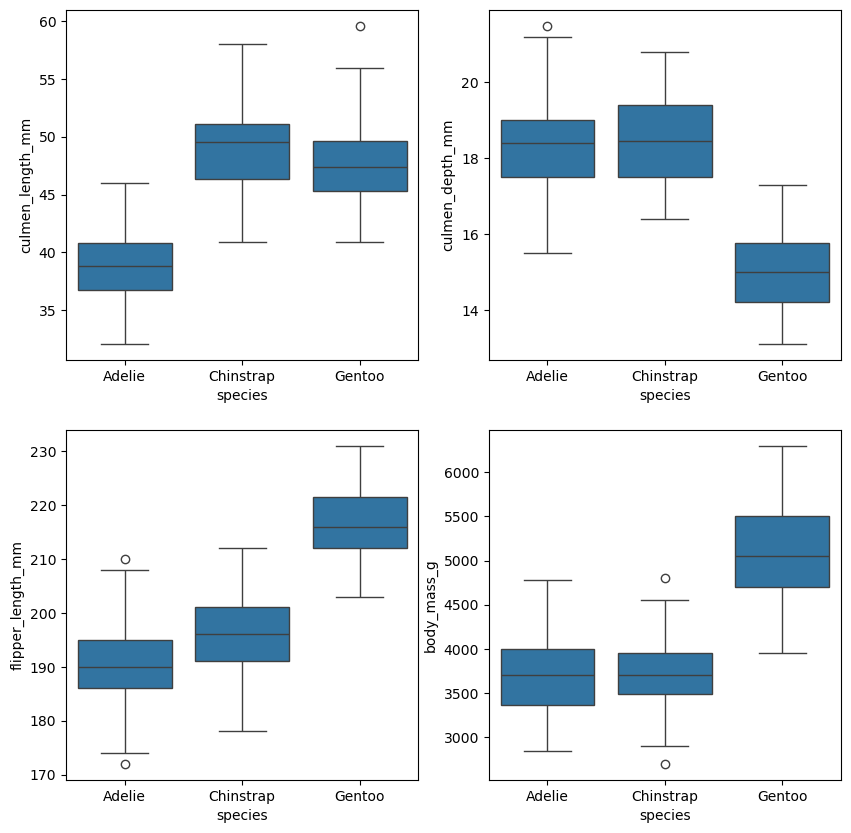

In [16]:
index = 0
plt.figure(figsize=(10,10))
for feature in df.select_dtypes("number"):
    if feature != "species":
        index += 1
        plt.subplot(2,2,index)
        sns.boxplot(x='species',y=feature,data=df)
        
# We can get the same insights here as we get from the pair plot.

## Correlation beetwen numeric features

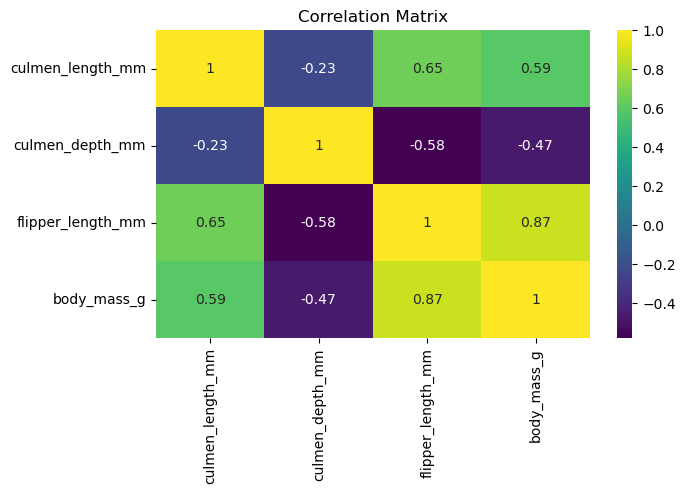

In [17]:
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

## Modeling with Pipeline

## Train | Test Split

In [18]:
X = df.drop(columns="species")
y = df['species']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [20]:
cat = X_train.select_dtypes("object").columns
cat

# Since we will do the transformations according to the unique categorical data in the train data, we first need to identify the categorical featurettes in the train data.

Index(['island', 'sex'], dtype='object')

In [ ]:
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring = ['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.768660
train_accuracy     0.769345
test_precision     0.400280
train_precision    0.401052
test_recall        0.815964
train_recall       0.818387
test_f1            0.536955
train_f1           0.538304
dtype: float64

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                        remainder='passthrough', 
                                        verbose_feature_names_out=False).set_output(transform="pandas")

# To automate our operations we will use make_column_transformer and pipeline as in one hot encoder.
# In the ordinal encoder algorithm the handle_unknown parameter is “error” by default. If we leave it at error
# The algorithm returns an error when a categorical data is encountered that is not in the train data but is in the test data. However
# If handle_unknown='use_encoded_value' and unknown_value=-1, a value that is not in train data but is in test data 
# categorical data is assigned a value of -1. The reason for assigning unknown_value=-1 is that the same number for other categorical data
# is to make sure that it will not be given. My advice is to leave it as default so that it freezes the error.

# make_column_transformer((ord_enc, cat), remainder='passthrough') function is a categorical
# will first convert the featurs to numeric data as mentioned above, with the remainder=“passthrough” parameter
# will not do anything to the numeric featura, leaving it as it is.

# make_column_transformer function changes the structure of the data. Categorical featuras will be the first featuras in the df 
# so that numeric featurs are reordered to follow them.

# Since the make_column_transformer function will transform columns into df and output array, the array will be transformed into df
# I use set_output(transform=“pandas”) to transform.

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestClassifier(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# With the fit process, first the categorical features of the train data are identified and the unique categorical data within these features 
# is converted into numeric data and sent to the relevant model for training.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=101))])

## Model Performance on Classification Tasks

In [23]:
from sklearn.metrics import confusion_matrix, classification_report,\
                            accuracy_score, recall_score, precision_score,\
                            f1_score

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

# predict transforms the test data into numeric data by transforming it according to the unique categorical data in the train data.

# since make_column_transform is in the pipeline, the df structure is modified as in the train data and sent to the relevant model to be predicted

### Random Forest

In [24]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV

In [25]:
help(RandomForestClassifier)

# Differences from DT;
# 1. In the criterion hyper parameter, in addition to gini and entropy, the log_loss function used in logistic regression is included. Default is gini.
# 2. max_features default is “sqrt”. it takes the square root of the total number of features in our data and converts the result to an integer number.
# 3. Random forest algorithms do not have the splitter hyper parameter. Branching is always done according to the best feature. It is not randomly selected
# 4. bootsrap hyper_pamatrix is added. Default is True. It uses approximately 2/3 of the observations in the train data for each tree with the random boostrap method.
# 5. oob_score hyper parameter measures the performance of each tree with 1/3 observations allocated for each tree and determines the feature importance. If you want to see the oob_scores, we need to set this hyper parameter to True.
# 6. class_weight has both “balanced” and “balanced_subsaple” as hyper parameters. DT does not have “balanced_subsample”. With “balanced” the weighting is based on the total number of classes in the data, while with “balanced_subsaple” the weighting is based on the number of classes in each tree.
# 7. With the max_samples hyper parameter, it does the training with observations at the ratios we choose (recommended ratios of 0.5, 0.8) to reduce the cost of running very large data.

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`sp

In [26]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

# scores with default values were much better than DT

Test_Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67


Train_Set
[[117   0   0]
 [  0  54   0]
 [  0   0  95]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        95

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



In [27]:
operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RandomForestClassifier(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=["accuracy", 
                                 "precision_micro", 
                                 "recall_micro", 
                                 "f1_micro"], 
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# no overfiting

test_accuracy            0.992593
train_accuracy           1.000000
test_precision_micro     0.992593
train_precision_micro    1.000000
test_recall_micro        0.992593
train_recall_micro       1.000000
test_f1_micro            0.992593
train_f1_micro           1.000000
dtype: float64

## Evaluating ROC Curves and AUC

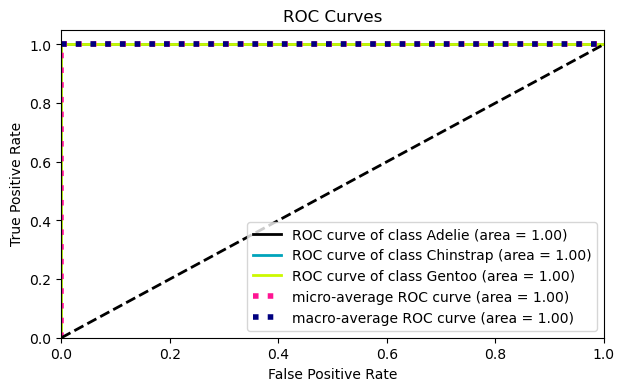

In [28]:
from scikitplot.metrics import plot_roc, precision_recall_curve

y_pred_proba = pipe_model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

# The model has a very high overall performance and is naturally very good at separating classes from each other.

### RF Model Feature Importance

In [29]:
pipe_model["RF_model"].feature_importances_ # rf_model.feature_importances_

# Since we are using pipeline, we first pull our ML model from the pipeline with pipe_model[“DT_model”] and then with feature_importances_ code, we define ratios in % to all features so that their sum is 1. 
# The feature with the highest ratio is the most important feature, while the feature with the lowest ratio is the least important feature.

# Since the make_column_transformer function used in pipe_model changes the order of the features in the df, the first 2 ratios below belong to categorical features while the following ratios belong to numeric features.

# If make_column_transformer was not used in the pipeline, the feature order of df would not change. Note that the ranking only changes when the make_column_transformer function is used.

# feature importance is done after getting the best scores from the model. In this particular data, since I was able to get very high scores with the default hyper parameters of the RF model, we did feature importance without gridsearch. 
# However, we do not forget that we need to do feature importance on the best hyper_parameters we find after gridsearch.

array([0.1090312 , 0.01036703, 0.35052176, 0.15568431, 0.25091596,
       0.12347973])

In [30]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

# The new feature order we get from pipe_model is as follows.

array(['island', 'sex', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g'], dtype=object)

In [31]:
rf_feature_imp = pd.DataFrame(data=pipe_model["RF_model"].feature_importances_, 
                              index = features, #index=X.columns
                              columns=["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending=False)
rf_feature_imp

,Feature Importance
culmen_length_mm,0.350522
flipper_length_mm,0.250916
culmen_depth_mm,0.155684
body_mass_g,0.123480
island,0.109031
sex,0.010367


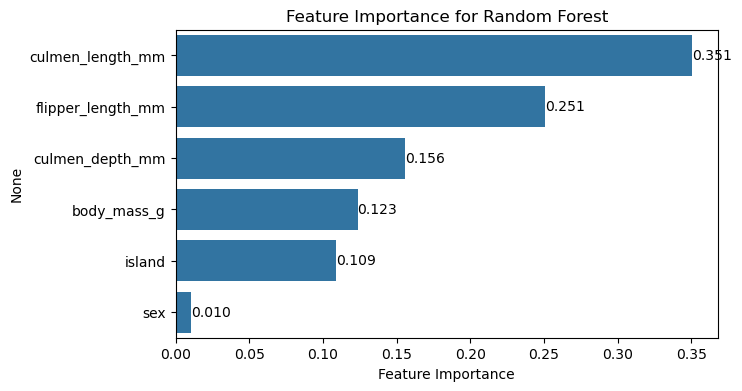

In [32]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], 
                 y=rf_feature_imp.index)

ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

## Understanding Hyperparameters

In [33]:
from sklearn.tree import plot_tree

def report_model(model, number_of_tree):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["RF_model"].estimators_[number_of_tree], 
              feature_names=list(features), #features_names=X.columns
              class_names=list(df.species.unique()),
              filled = True,
              fontsize = 8);

# model[“RF_model”].estimators_[number_of_tree], we can visualize the tree we want by giving the tree number (number_of_tree).

In [34]:
RF_model = RandomForestClassifier(random_state=101)

operations = [("OrdinalEncoder", column_trans), 
              ("RF_model", RF_model)]

pruned_tree = Pipeline(steps=operations) # pruned_tree = RandomForestClassifier(max_samples=0.5)

pruned_tree.fit(X_train,y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestClassifier(random_state=101))])



Test Set
[[29  0  0]
 [ 0 14  0]
 [ 0  0 24]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        29
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



Train Set
[[117   0   0]
 [  0  54   0]
 [  0   0  95]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       117
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        95

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266



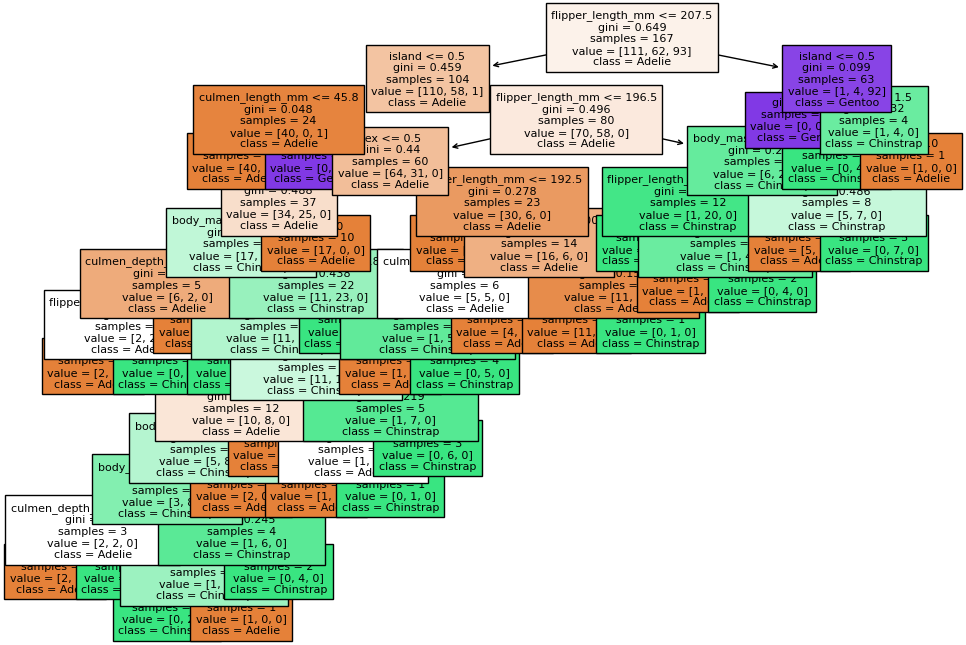

In [35]:
report_model(pruned_tree, 52)

# 266*2/3 = 177.33

# Approximately 2/3 of the 266 observations in the #train dara are used in each tree. as you can see in this tree, close to this proportion of observations are used.

## Final Model and Prediction

In [36]:
X = df.drop(columns=["species"])
y = df['species']

In [37]:
X.head(2)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


In [38]:
operations = [("transformer", column_trans), 
              ("RF", RandomForestClassifier(random_state=101))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X, y)

# Since our scores are very good, we did not do gridsearch, we will do gridsearch in the diabetes dataset that we will solve below.

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['island', 'sex'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('RF', RandomForestClassifier(random_state=101))])

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,333.0,43.992793,5.468668,32.1,39.5,44.5,48.6,59.6
culmen_depth_mm,333.0,17.164865,1.969235,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,333.0,200.966967,14.015765,172.0,190.0,197.0,213.0,231.0
body_mass_g,333.0,4207.057057,805.215802,2700.0,3550.0,4050.0,4775.0,6300.0


In [40]:
observations = {"island": ["Torgersen", "Biscoe"], 
                "culmen_length_mm":[39, 48], 
                "culmen_depth_mm":[18, 14],
                "flipper_length_mm":[180, 213], 
                "body_mass_g":[3700, 4800], 
                "sex":["MALE", "FEMALE"]}

obs = pd.DataFrame(observations)
obs

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39,18,180,3700,MALE
1,Biscoe,48,14,213,4800,FEMALE


In [41]:
pipe_model.predict(obs)

array(['Adelie', 'Gentoo'], dtype=object)

END OF THE PROJECT